In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np 
from scipy import stats
import pingouin as pg
import json

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def process_tags(df):
    # Iterar sobre cada fila del DataFrame
    for index, row in df.iterrows():
        tags = row['tags']
        normalization_type = None
        pooling_type = None
        dropout_type = None
        
        # Buscar tags según los criterios especificados
        for tag in tags:
            if tag.startswith('N_'):
                normalization_type = tag.split('N_')[1]
            elif tag.startswith('P_'):
                pooling_type = tag.split('P_')[1]
            elif tag.startswith('D_'):
                dropout_type = tag.split('D_')[1]
        
        # Agregar las columnas correspondientes con los valores encontrados
        df.at[index, 'normalization_type'] = normalization_type
        df.at[index, 'pooling_type'] = pooling_type
        df.at[index, 'dropout_type'] = dropout_type
    
    # Eliminar la columna tags si ya no es necesaria
    # df.drop(columns=['tags'], inplace=True)

def create_custom_index(row):
    return f"model_{row['config']}_{row['arch_name']}"

def string_to_list(s):
    # Eliminar los corchetes de los extremos y dividir por comas
    items = s.strip("[]").split(", ")
    
    # Eliminar las comillas simples y dobles de los extremos de cada elemento
    cleaned_items = [item.strip("'\"") for item in items]
    
    return cleaned_items

In [3]:
df = pd.read_csv('results_ass2.csv')
df['tags'] = df['tags'].apply(string_to_list)
process_tags(df)
df['arch_name'] = df['arch_name'].str.replace('architecture_', '')
print(f"The sample is composed by {df.shape[0]} diferent models")
print(f"DataFrame columns ({df.shape[1]}): ", list(df.columns[1:]))
df.index = df.apply(create_custom_index, axis=1)
df.head(5)

The sample is composed by 826 diferent models
DataFrame columns (24):  ['arch_name', 'arch', 'config', 'Num_conv', 'Num_denses', 'Num_pooling', 'Num_normalization', 'Num_droputs', 'KW', 'Filters', 'drop_ratio', 'num_simulation', 'folder', 'metric_presets', 'tags', 'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'normalization_type', 'pooling_type', 'dropout_type']


,Unnamed: 0,arch_name,arch,config,Num_conv,Num_denses,Num_pooling,Num_normalization,Num_droputs,KW,...,metric_presets,tags,accuracy,precision,recall,f1_score,roc_auc,normalization_type,pooling_type,dropout_type
model_config1_3conv_3dense_1,0,3conv_3dense_1,"['C', 'C', 'C', 'flatten', 'F', 'F', 'F', '204...",config1,3,3,0,0,0,50_cte,...,['ClassificationPreset'],"[N_None, P_None, D_None, KW#50_cte, F#16_cte, ...",0.650000,0.609756,0.833333,0.704225,0.725556,None,None,None
model_config2_3conv_3dense_1,1,3conv_3dense_1,"['C', 'C', 'C', 'flatten', 'F', 'F', 'F', '204...",config2,3,3,0,0,0,5_cte,...,['ClassificationPreset'],"[N_None, P_None, D_None, KW#5_cte, F#16_cte, R...",0.650000,0.609756,0.833333,0.704225,0.725556,None,None,None
model_config1_3conv_3dense_2,2,3conv_3dense_2,"['C', 'C', 'C', 'N', 'flatten', 'F', 'F', 'F',...",config1,3,3,0,1,0,50_cte,...,['ClassificationPreset'],"[N_Parcial, P_None, D_None, KW#50_cte, F#16_ct...",0.483333,0.491228,0.933333,0.643678,0.451111,Parcial,None,None
model_config2_3conv_3dense_2,3,3conv_3dense_2,"['C', 'C', 'C', 'N', 'flatten', 'F', 'F', 'F',...",config2,3,3,0,1,0,5_cte,...,['ClassificationPreset'],"[N_Parcial, P_None, D_None, KW#5_cte, F#16_cte...",0.483333,0.491228,0.933333,0.643678,0.451111,Parcial,None,None
model_config1_3conv_3dense_3,4,3conv_3dense_3,"['C', 'N', 'C', 'N', 'C', 'N', 'flatten', 'F',...",config1,3,3,0,3,0,50_cte,...,['ClassificationPreset'],"[N_Full, P_None, D_None, KW#50_cte, F#16_cte, ...",0.483333,0.491228,0.933333,0.643678,0.451111,Full,None,None


In [4]:
df.arch_name.value_counts()

arch_name
10conv_7dense_33    2
3conv_3dense_1      2
3conv_3dense_2      2
3conv_3dense_3      2
3conv_3dense_4      2
                   ..
3conv_3dense_36     2
3conv_7dense_1      2
3conv_7dense_2      2
7conv_7dense_23     1
5conv_7dense_11     1
Name: count, Length: 414, dtype: int64

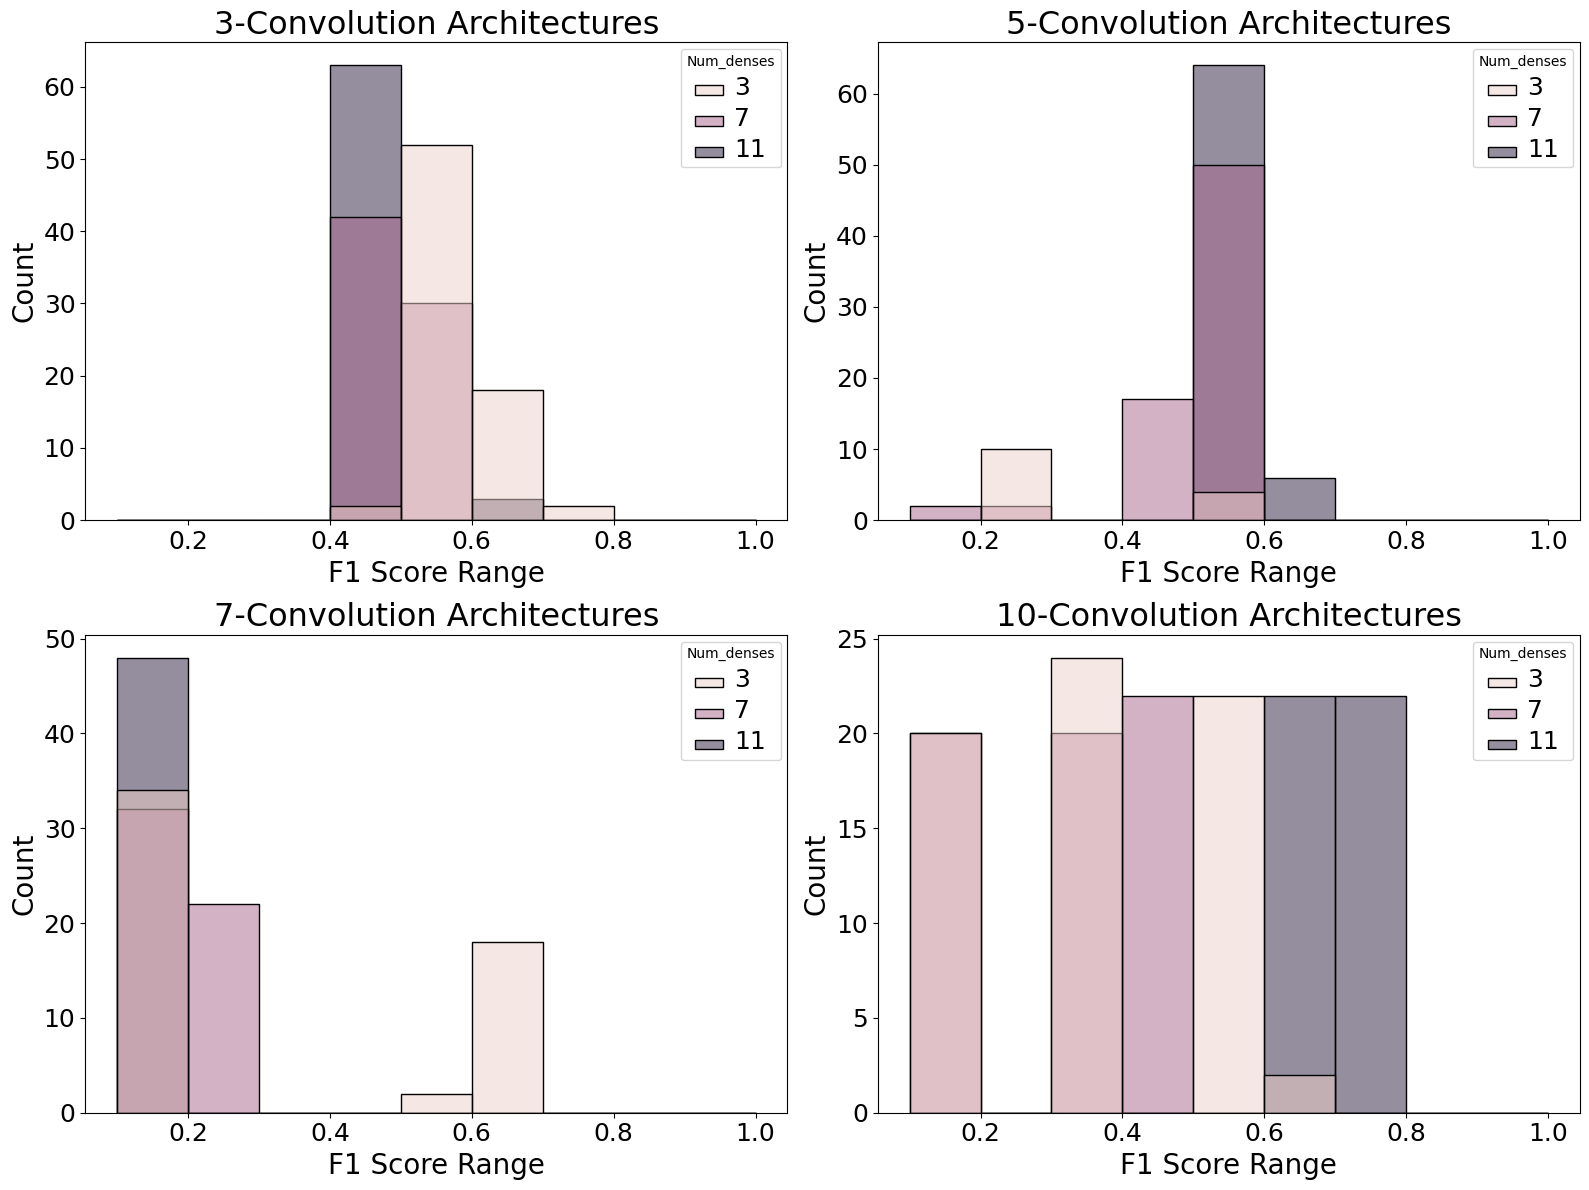

In [5]:
# Define the bins for the histogram
# bins = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Filter data for each architecture group
data_3conv = df[df['arch_name'].str.startswith('3conv_')]
data_5conv = df[df['arch_name'].str.startswith('5conv_')]
data_7conv = df[df['arch_name'].str.startswith('7conv_')]
data_10conv = df[df['arch_name'].str.startswith('10conv_')]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot for 3 convolutions
sns.histplot(data=data_3conv, x='f1_score', bins=bins, multiple='layer', hue='Num_denses', ax=axs[0, 0])
axs[0, 0].set_title('3-Convolution Architectures', fontsize=23)
axs[0, 0].set_xlabel('F1 Score Range', fontsize=20)
axs[0, 0].set_ylabel('Count', fontsize=20)
axs[0, 0].tick_params(axis='x', labelsize=18)
axs[0, 0].tick_params(axis='y', labelsize=18)
legend = axs[0, 0].get_legend()
for text in legend.get_texts():
    text.set_fontsize(18)


# Plot for 5 convolutions
sns.histplot(data=data_5conv, x='f1_score', bins=bins, multiple='layer', hue='Num_denses', ax=axs[0, 1])
axs[0, 1].set_title('5-Convolution Architectures', fontsize=23)
axs[0, 1].set_xlabel('F1 Score Range', fontsize=20)
axs[0, 1].set_ylabel('Count', fontsize=20)
axs[0, 1].tick_params(axis='x', labelsize=18)
axs[0, 1].tick_params(axis='y', labelsize=18)
legend = axs[0, 1].get_legend()
for text in legend.get_texts():
    text.set_fontsize(18)

# Plot for 7 convolutions
sns.histplot(data=data_7conv, x='f1_score', bins=bins, multiple='layer', hue='Num_denses', ax=axs[1, 0])
axs[1, 0].set_title('7-Convolution Architectures', fontsize=23)
axs[1, 0].set_xlabel('F1 Score Range', fontsize=20)
axs[1, 0].set_ylabel('Count', fontsize=20)
axs[1, 0].tick_params(axis='x', labelsize=18)
axs[1, 0].tick_params(axis='y', labelsize=18)
legend = axs[1, 0].get_legend()
for text in legend.get_texts():
    text.set_fontsize(18)


# Plot for 10 convolutions
sns.histplot(data=data_10conv, x='f1_score', bins=bins, multiple='layer', hue='Num_denses', ax=axs[1, 1])
axs[1, 1].set_title('10-Convolution Architectures', fontsize=23)
axs[1, 1].set_xlabel('F1 Score Range', fontsize=20)
axs[1, 1].set_ylabel('Count', fontsize=20)
axs[1, 1].tick_params(axis='x', labelsize=18)
axs[1, 1].tick_params(axis='y', labelsize=18)
legend = axs[1, 1].get_legend()
for text in legend.get_texts():
    text.set_fontsize(18)

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
data_3conv.config.value_counts()

config
config1    108
config2    108
Name: count, dtype: int64

In [15]:
# Encuentra el índice del máximo valor en la columna f1_score
indice_maximo = df['f1_score'].idxmax()

# Accede a la fila que contiene el máximo valor en f1_score
fila_maxima = df.loc[indice_maximo]
fila_maxima
# el report:
# https://app.evidently.cloud/projects/1664e070-4d06-4203-af66-236f884f10d3/reports/05010760-a71b-4e0c-bd60-4ff81de60ee5

Unnamed: 0                                                          778
arch_name                                             10conv_11dense_12
arch                  ['C', 'C', 'N', 'P', 'C', 'C', 'N', 'P', 'C', ...
config                                                          config1
Num_conv                                                             10
Num_denses                                                           11
Num_pooling                                                           5
Num_normalization                                                     5
Num_droputs                                                           0
KW                                                               50_cte
Filters                                                          16_cte
drop_ratio                                                      0.5_cte
num_simulation                                                    sim_7
folder                                                          

In [37]:
# Ordena el DataFrame por la columna 'f1_score' en orden descendente
df_ordenado = df.sort_values(by='f1_score', ascending=False)

# Selecciona la segunda fila (índice 1) del DataFrame ordenado
fila_segundo_maximo = df_ordenado.iloc[1]
fila_segundo_maximo

Unnamed: 0                                                          787
arch_name                                             10conv_11dense_16
arch                  ['C', 'C', 'N', 'C', 'C', 'N', 'C', 'C', 'N', ...
config                                                          config2
Num_conv                                                             10
Num_denses                                                           11
Num_pooling                                                           0
Num_normalization                                                     5
Num_droputs                                                          11
KW                                                                5_cte
Filters                                                          16_cte
drop_ratio                                                      0.5_cte
num_simulation                                                    sim_1
folder                                                          

In [ ]:
# Visualiza el F1 score en función de la columna folder
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='f1_score', hue='folder', multiple='stack', kde=True)
plt.title('Distribución de F1 Score por Folder')
plt.xlabel('F1 Score')
plt.ylabel('Frecuencia')
# plt.legend(title='Folder')
plt.show()

In [ ]:
# # Visualiza el F1 score en función del número de normalizaciones
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Num_normalization', y='f1', data=df)
# plt.title('F1 Score en función del número de normalizaciones')
# plt.xlabel('Número de normalizaciones')
# plt.ylabel('F1 Score')
# plt.show()
# # Lista de métricas que queremos visualizar
metricas = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']

# # Crear una gráfica de barras para cada métrica
# for metrica in metricas:
#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='Num_normalization', y=metrica, data=df)
#     plt.title(f'{metrica.capitalize()} en función del número de normalizaciones')
#     plt.xlabel('Número de normalizaciones')
#     plt.ylabel(metrica.capitalize())
#     plt.show()

In [ ]:
df.pooling_type.value_counts()

pooling_type
None       356
Parcial    260
Full       210
Name: count, dtype: int64

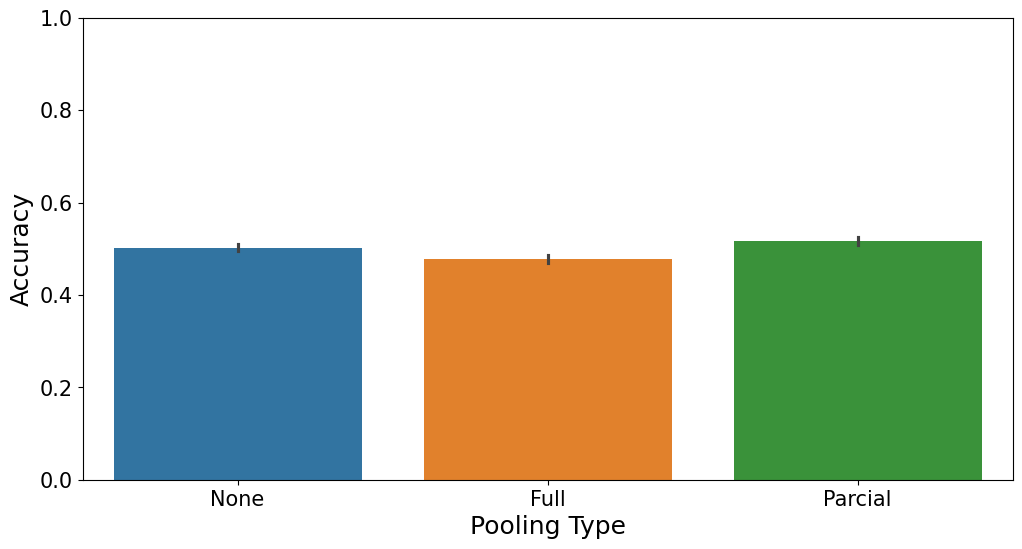

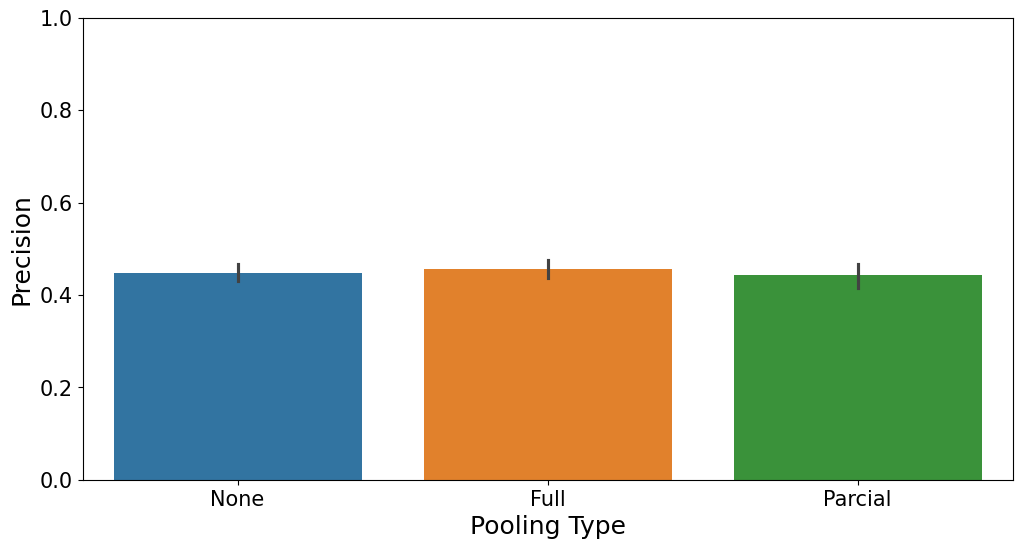

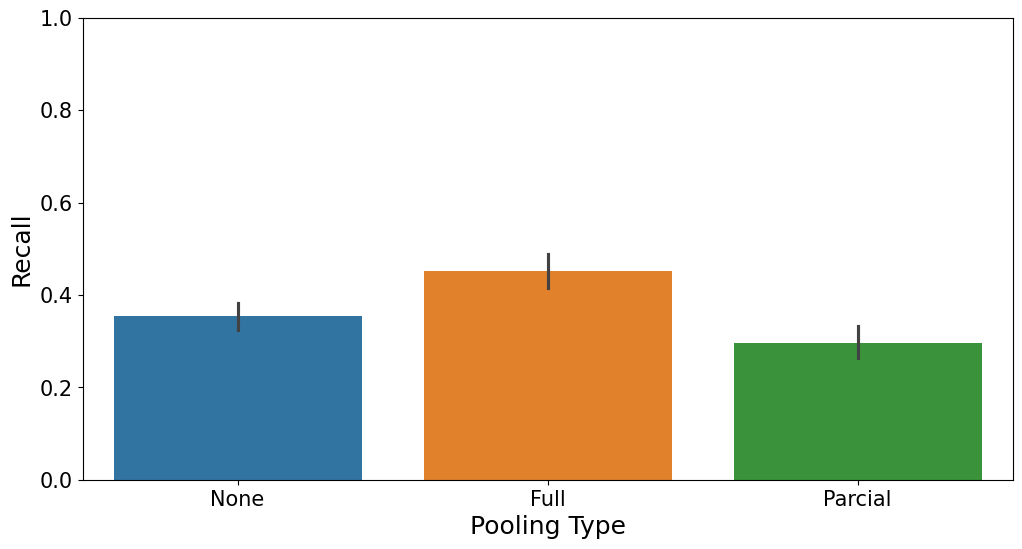

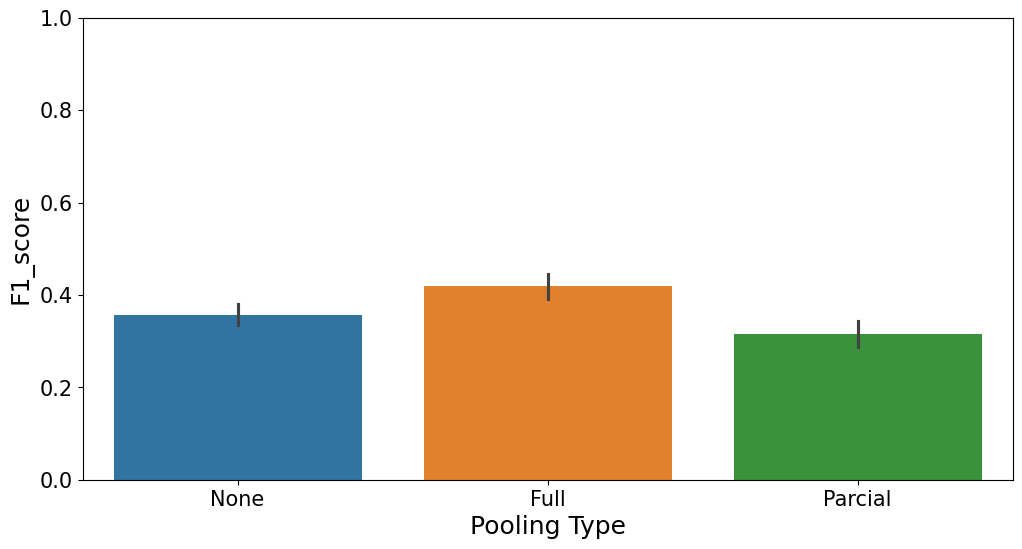

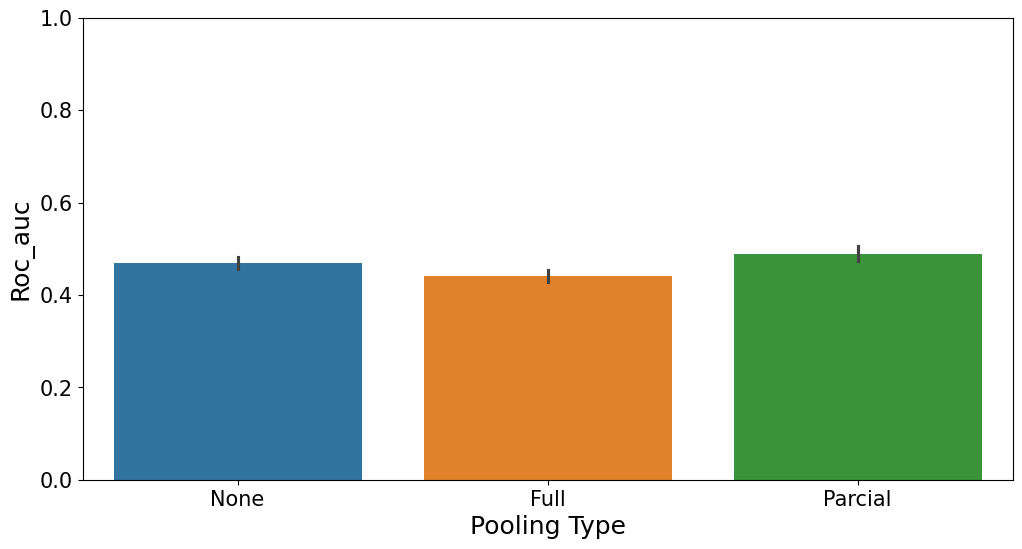

In [ ]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['pooling_type'].nunique()  # Número de barras
    colores = sns.color_palette("tab10", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='pooling_type', y=metrica, hue='pooling_type', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the Number of Pooling Type')
    plt.xlabel('Pooling Type', fontsize=18)
    plt.ylabel(metrica.capitalize(), fontsize=18)
    
    # Mostrar el gráfico
    plt.ylim(0, 1)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [ ]:
df.Num_denses.value_counts()

Num_denses
7     280
11    274
3     272
Name: count, dtype: int64

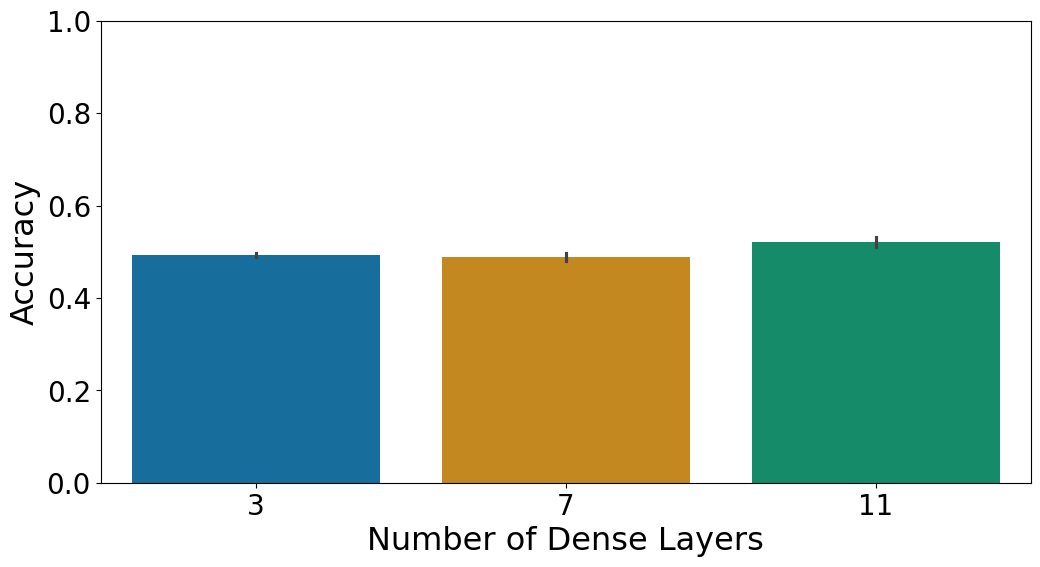

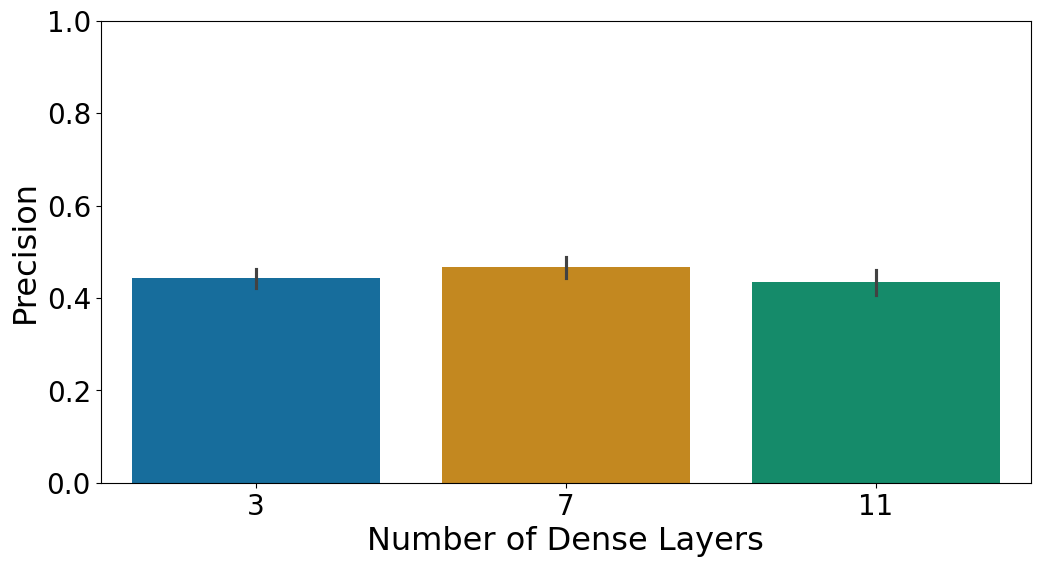

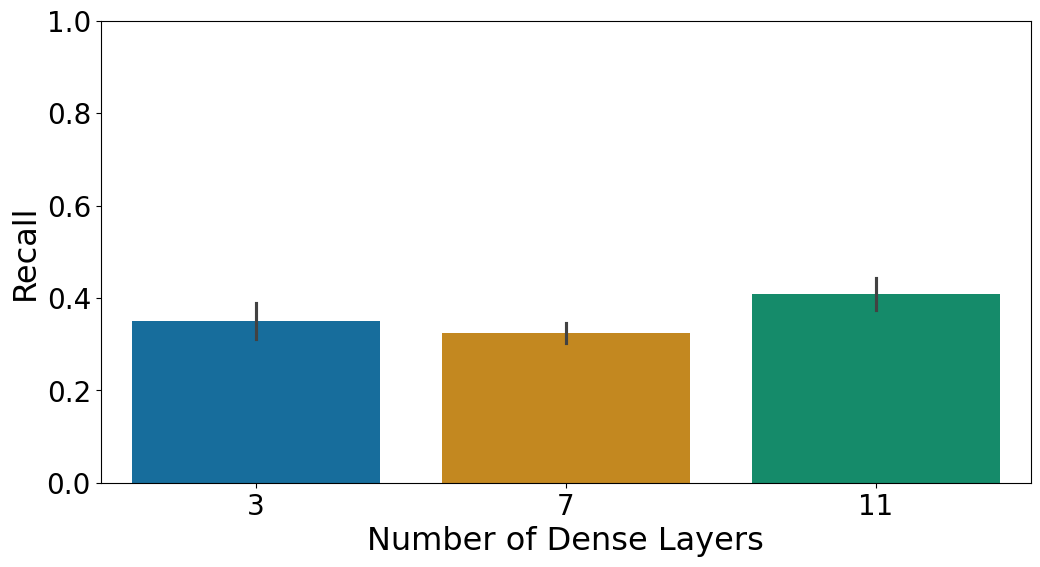

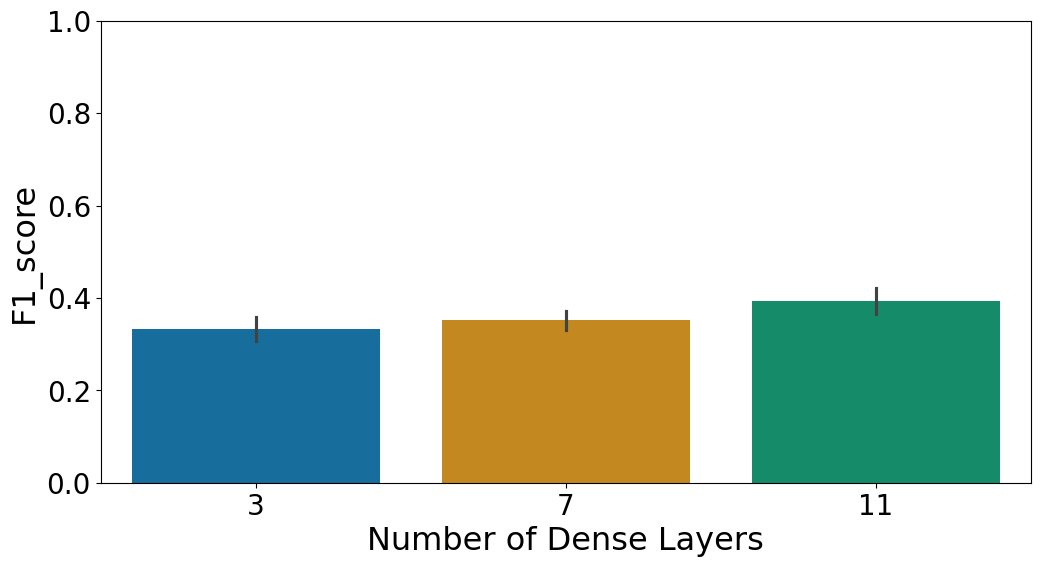

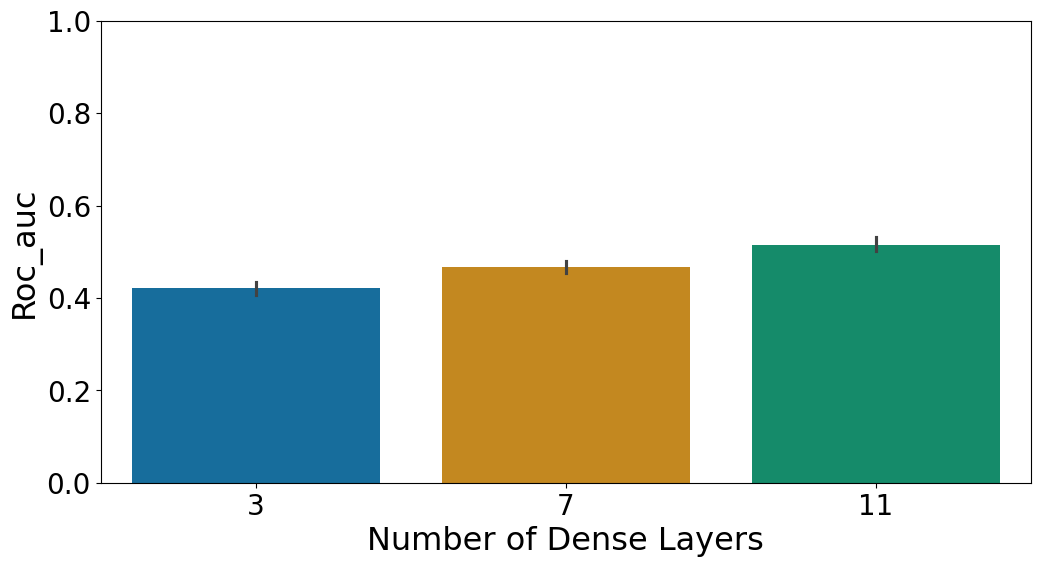

In [ ]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['Num_denses'].nunique()  # Número de barras
    colores = sns.color_palette("colorblind", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='Num_denses', y=metrica, hue='Num_denses', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the Number of Dense Layers')
    plt.xlabel('Number of Dense Layers', fontsize=23)
    plt.ylabel(metrica.capitalize(), fontsize=23)
    
    # Mostrar el gráfico
    plt.ylim(0, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

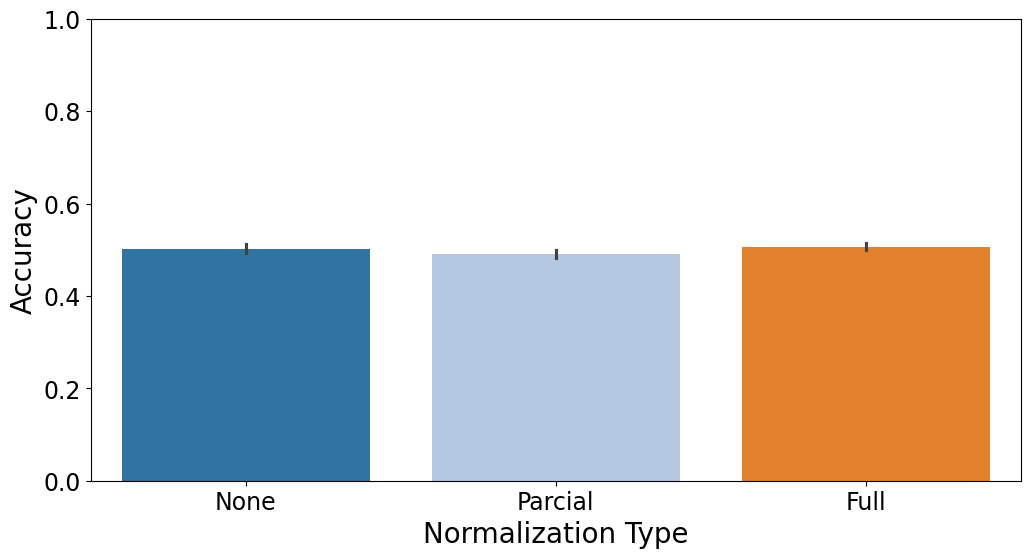

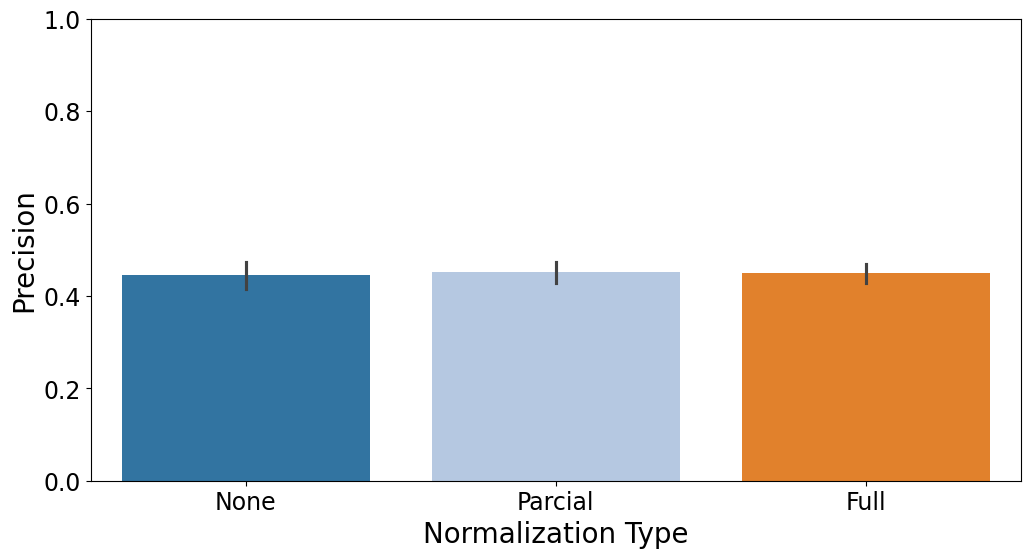

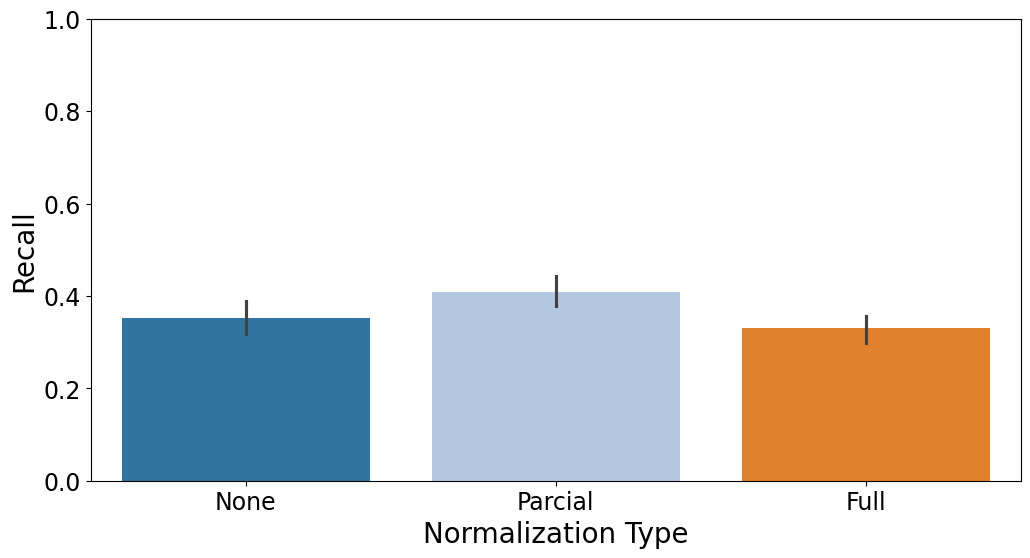

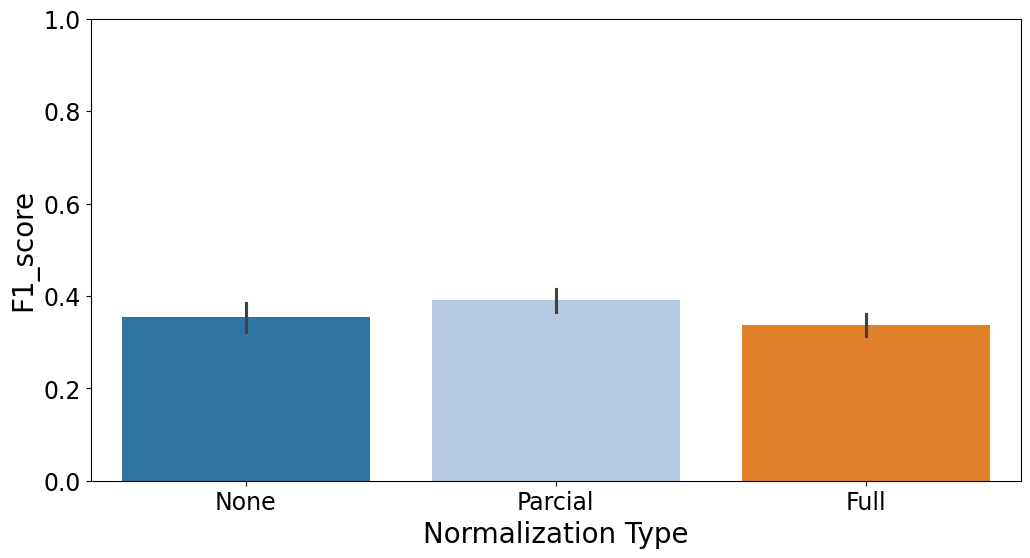

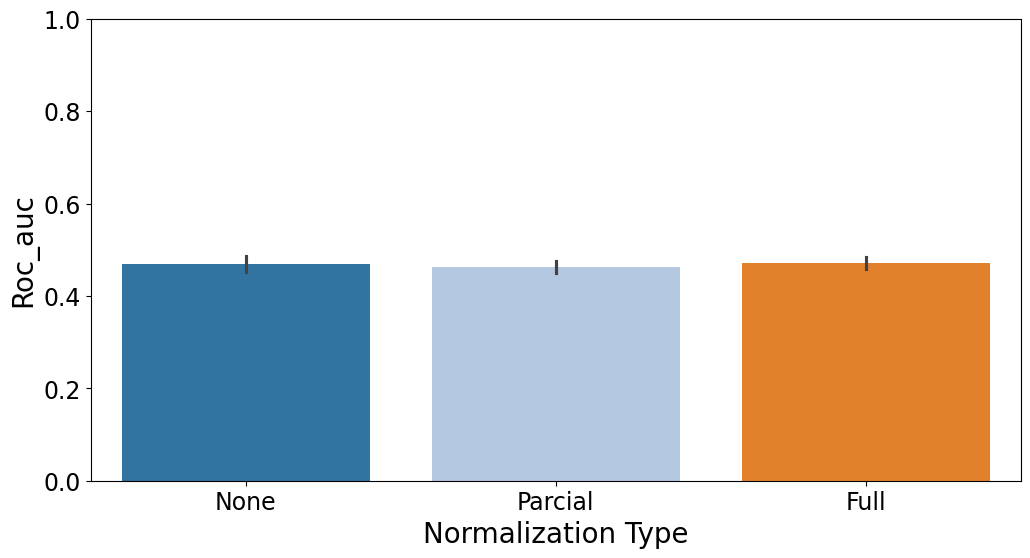

In [ ]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['normalization_type'].nunique()  # Número de barras
    colores = sns.color_palette("tab20", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='normalization_type', y=metrica, hue='normalization_type', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the Normalization Type')
    plt.xlabel('Normalization Type', fontsize=20)
    plt.ylabel(metrica.capitalize(), fontsize=20)
    
    # Mostrar el gráfico
    plt.ylim(0, 1)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()

In [ ]:
df.normalization_type.value_counts()

normalization_type
Full       348
Parcial    266
None       212
Name: count, dtype: int64

In [ ]:
df.pooling_type.value_counts()

pooling_type
None       356
Parcial    260
Full       210
Name: count, dtype: int64

In [ ]:
df.dropout_type.value_counts()

dropout_type
None       281
Parcial    281
Full       264
Name: count, dtype: int64

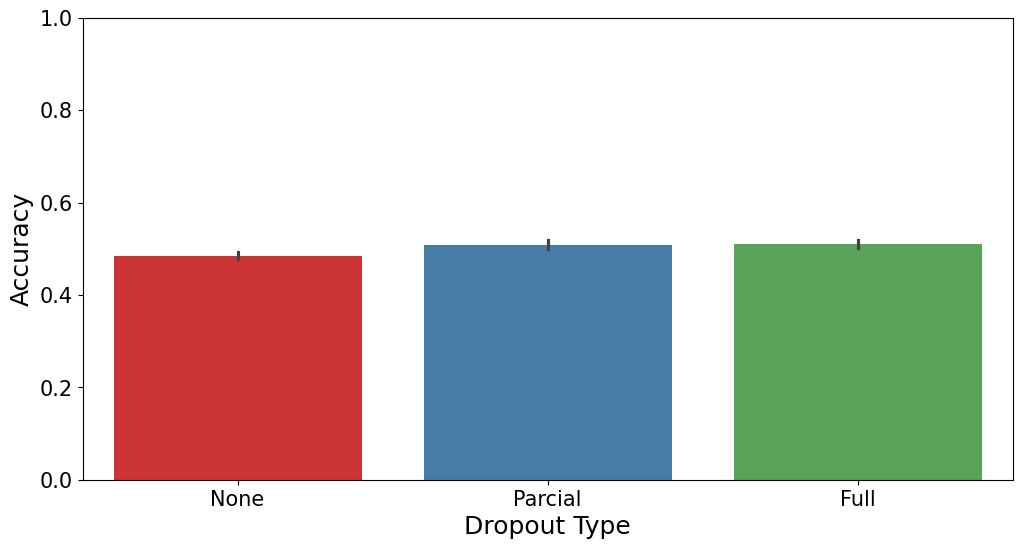

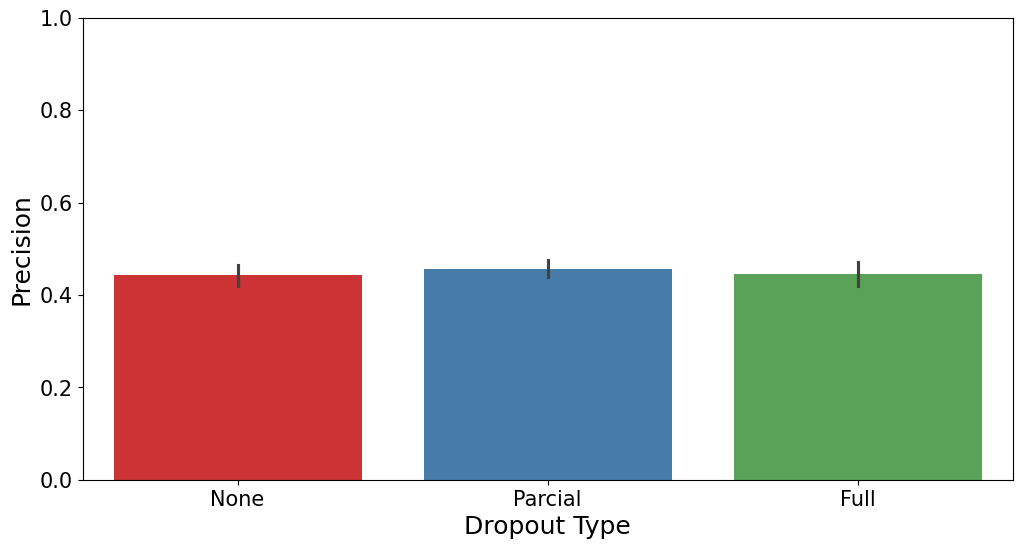

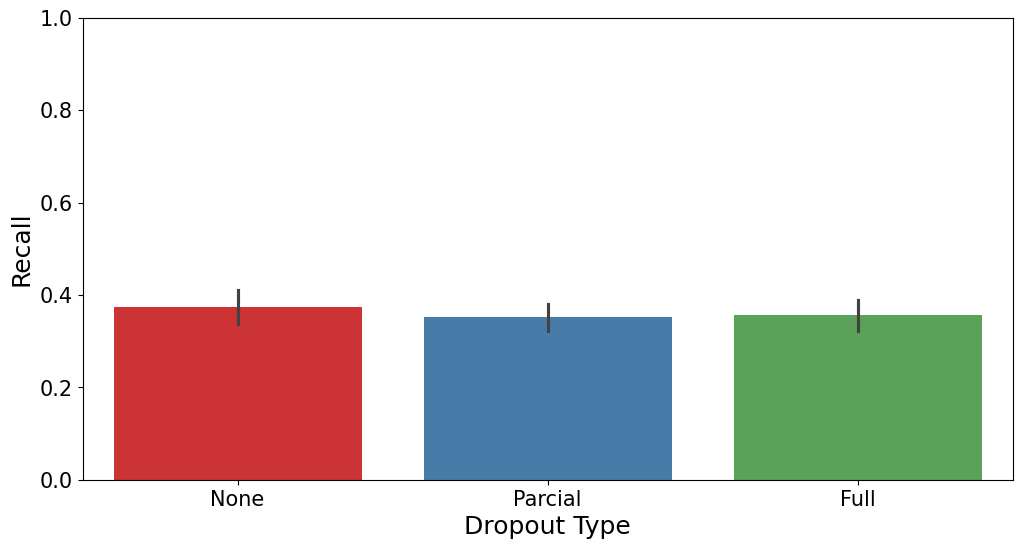

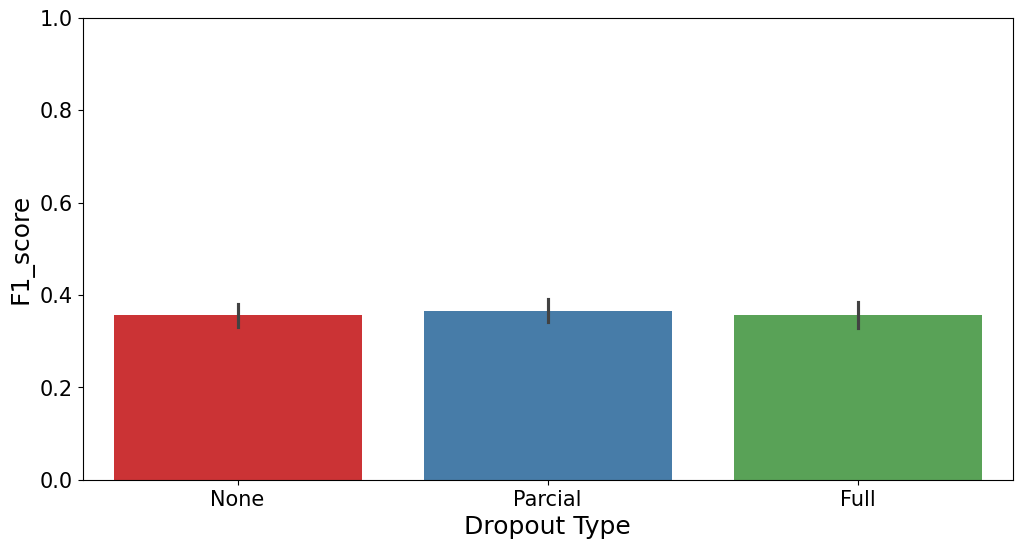

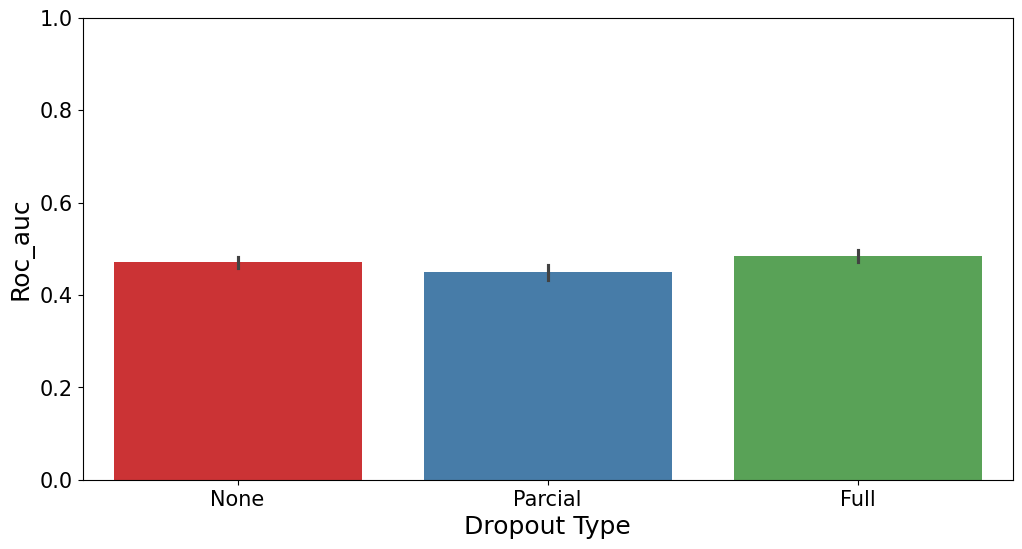

In [ ]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['dropout_type'].nunique()  # Número de barras
    colores = sns.color_palette("Set1", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='dropout_type', y=metrica, hue='dropout_type', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the Dropout Type')
    plt.xlabel('Dropout Type', fontsize=20)
    plt.ylabel(metrica.capitalize(), fontsize=20)
    
    # Mostrar el gráfico
    plt.ylim(0, 1)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.show()

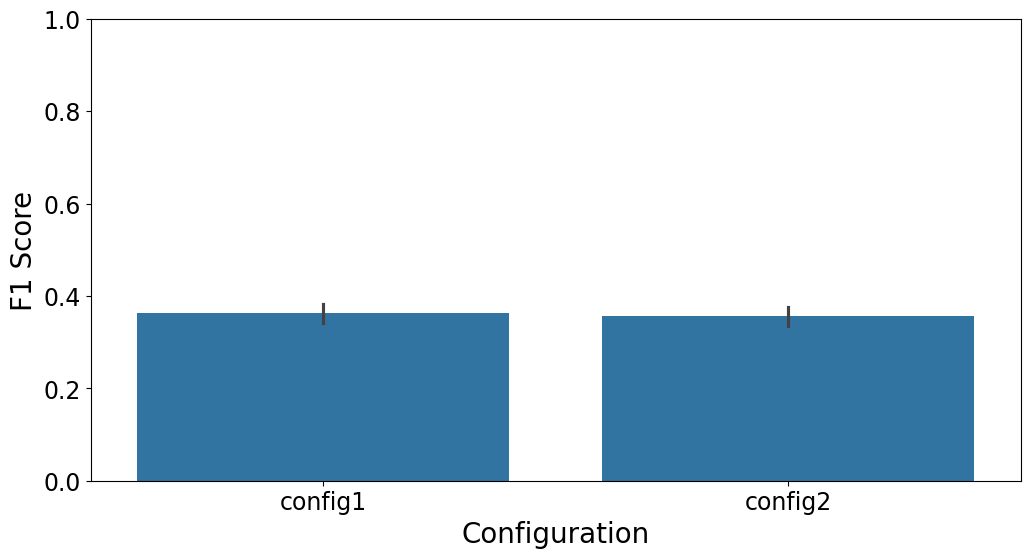

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='config', y='f1_score', data=df)
# plt.title('F1 Score based on the configuration')
plt.xlabel('Configuration', fontsize=20)
plt.ylabel('F1 Score', fontsize=20)
plt.ylim(0, 1)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [ ]:
average_accuracy = df.groupby('Num_conv')['accuracy'].mean()
average_accuracy

Num_conv
3     0.457485
5     0.512481
7     0.474027
10    0.560101
Name: accuracy, dtype: float64

In [ ]:
average_accuracy = df.groupby('Num_conv')['precision'].mean()
average_accuracy

Num_conv
3     0.460991
5     0.464397
7     0.337376
10    0.527463
Name: precision, dtype: float64

In [ ]:
average_accuracy = df.groupby('Num_conv')['recall'].mean()
average_accuracy

Num_conv
3     0.566821
5     0.323721
7     0.169543
10    0.367003
Name: recall, dtype: float64

In [ ]:
average_accuracy = df.groupby('Num_conv')['f1_score'].mean()
average_accuracy

Num_conv
3     0.501947
5     0.358435
7     0.176315
10    0.387623
Name: f1_score, dtype: float64

In [ ]:
average_accuracy = df.groupby('Num_conv')['roc_auc'].mean()
average_accuracy

Num_conv
3     0.429938
5     0.469860
7     0.371512
10    0.602626
Name: roc_auc, dtype: float64

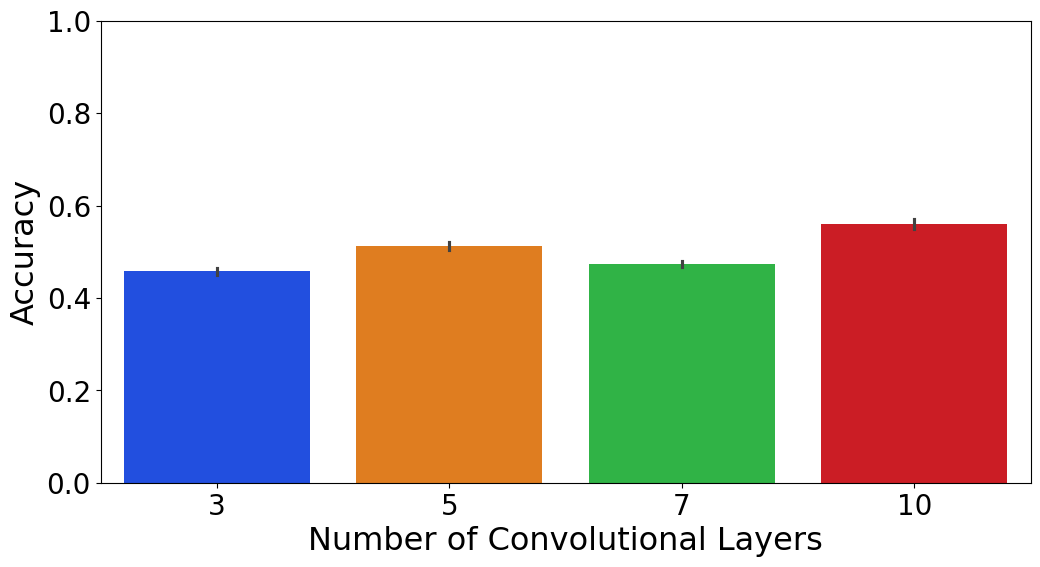

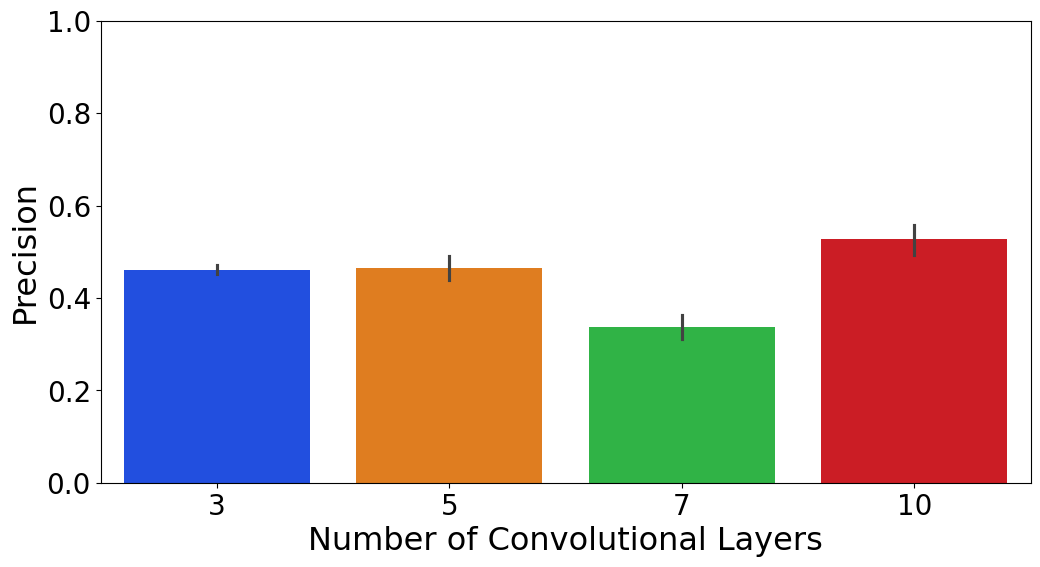

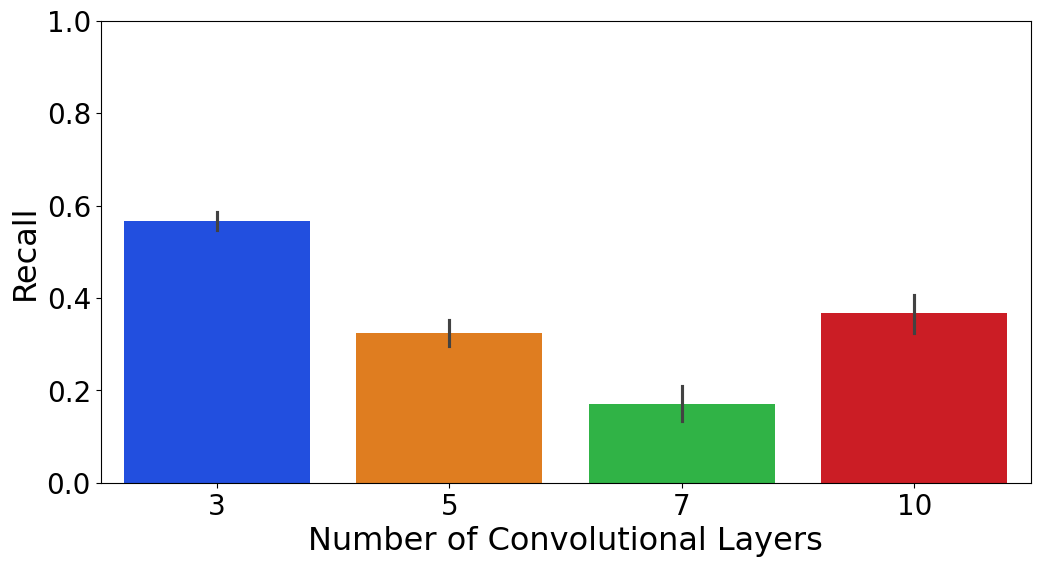

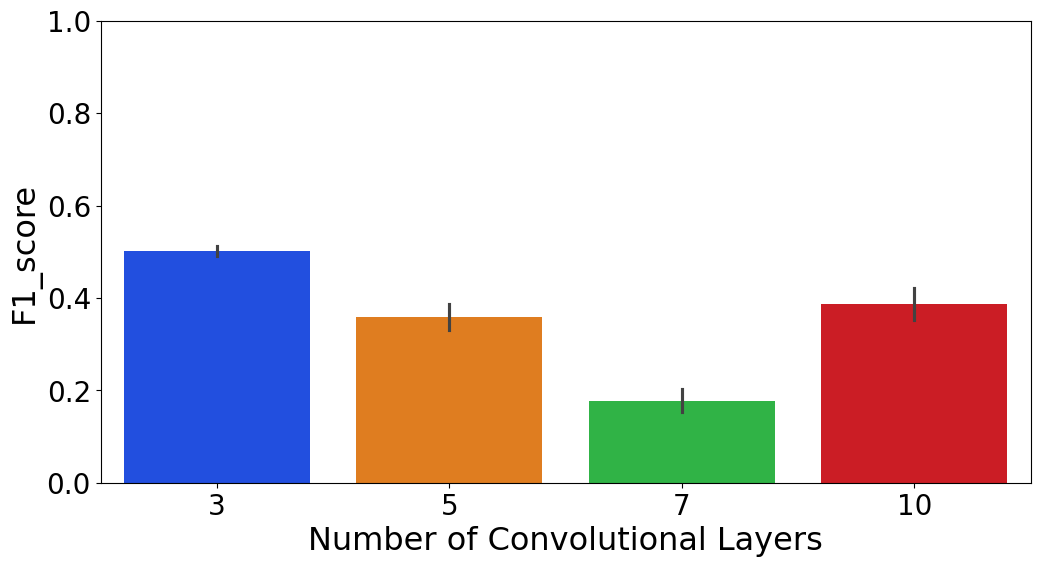

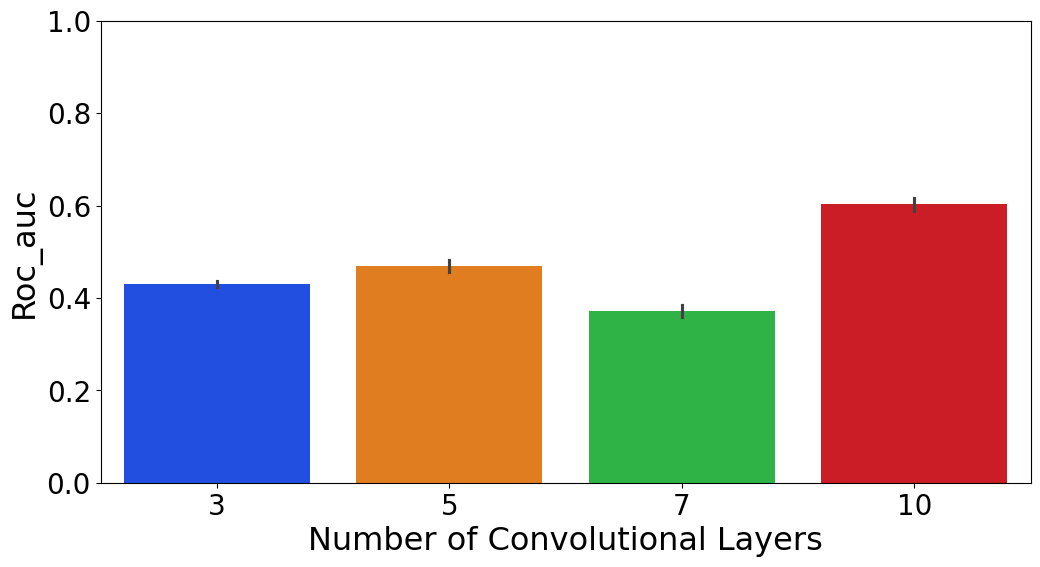

In [ ]:
# Crear una gráfica de barras para cada métrica
for metrica in metricas:
    plt.figure(figsize=(12, 6))
    
    # Obtener una paleta de colores con tantos colores como barras haya
    num_barras = df['Num_conv'].nunique()  # Número de barras
    colores = sns.color_palette("bright", num_barras)  # Paleta de colores con tantos colores como barras
    
    # Crear el gráfico de barras asignando `hue` a `Num_conv` y desactivando la leyenda
    sns.barplot(x='Num_conv', y=metrica, hue='Num_conv', data=df, palette=colores, dodge=False, legend=False)
    
    # Configurar el título y etiquetas del gráfico
    # plt.title(f'{metrica.capitalize()} based on the Number of Convolutional Layers')
    plt.xlabel('Number of Convolutional Layers', fontsize=23)
    plt.ylabel(metrica.capitalize(), fontsize=23)
    
    # Mostrar el gráfico
    plt.ylim(0, 1)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()